In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
t_df = pd.DataFrame()
for fl in os.listdir("./../../data/composite_vars"):
    df = pd.read_csv(f"./../../data/composite_vars/{fl}")
    if fl not in ["INF.csv", "PR.csv"]:
        df = df.rename(columns={f"{df.columns[1]}":fl[:-4]})
        if t_df.empty:
            t_df = df
        else:
            t_df = pd.merge(t_df, df, on='date')
    else:
        t_df[fl[:-4]] = df[fl[:-4]]

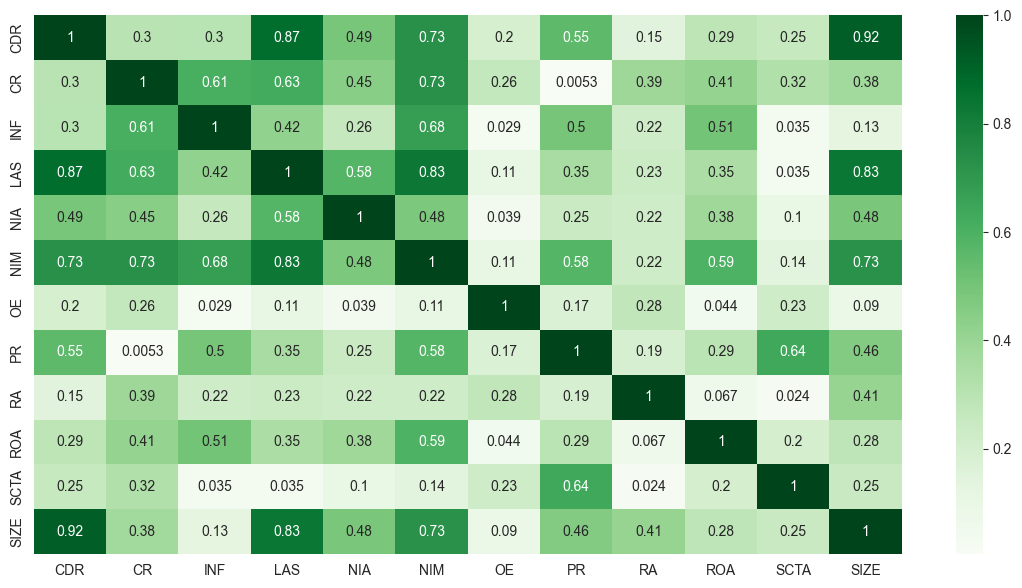

In [3]:
corr_df = t_df.drop('date', axis=1)
corr_matrix = abs(corr_df.corr())
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap="Greens")
plt.show()

In [4]:
t_df

,date,CDR,CR,INF,LAS,NIA,NIM,OE,PR,RA,ROA,SCTA,SIZE
0,2019-02-01,0.490675,0.605298,8.6,0.285435,0.613768,0.004653,0.004272,18.00,0.082862,0.007581,0.026454,20.830766
1,2019-03-01,0.482747,0.604172,8.8,0.275101,0.425058,0.002722,0.002261,18.00,0.085840,0.006403,0.026421,20.828853
2,2019-04-01,0.502489,0.597602,9.6,0.271608,0.571109,0.003809,0.003505,18.00,0.089112,0.006670,0.026939,20.811147
3,2019-05-01,0.506370,0.594143,9.0,0.257686,0.468113,0.003902,0.003401,17.92,0.079750,0.008337,0.036743,20.825042
4,2019-06-01,0.508021,0.593921,9.1,0.261666,0.407609,0.003734,0.003381,17.50,0.080417,0.009162,0.027939,20.821205
5,2019-07-01,0.491045,0.591415,8.8,0.246380,0.579114,0.003838,0.003297,17.50,0.083876,0.006627,0.031096,20.840556
6,2019-08-01,0.494163,0.593519,7.5,0.255911,0.388710,0.003755,0.003414,17.29,0.089237,0.009659,0.030460,20.840770
7,2019-09-01,0.495780,0.584927,6.5,0.240834,0.612055,0.003754,0.003533,17.00,0.093095,0.006134,0.030451,20.866503
8,2019-10-01,0.499908,0.580119,5.1,0.261466,0.628776,0.003951,0.003680,16.58,0.096960,0.006283,0.029820,20.867340
9,2019-11-01,0.500890,0.582658,4.1,0.254785,0.500818,0.003788,0.003732,16.27,0.096153,0.007563,0.030883,20.917113
